<h1>Collection of Figures From the Report</h1>
<h3>Kyle Otstot</h3>

Please see the report (file $\texttt{report.pdf}$) for the figure references.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Read raw train and test sets
df_train = pd.read_csv('data/training_raw.csv')
df_test = pd.read_csv('data/testing_raw.csv')
df_train.head(1)

,sor,cdf_seq_no,trans_desc,merchant_cat_code,amt,db_cr_cd,payment_reporting_category,payment_category,is_international,default_brand,default_location,qrated_brand,coalesced_brand,Category
0,HH,T20110701260061756,RECUR DEBIT CRD PMT11/11 DELTA DENTAL OF A11 O...,6300.0,58.34,D,Card,Debit Card,False,DELTA DENTAL OF A11 OF,111-1111111 AR,Delta Dental,Delta Dental,Finance


In [10]:
palette = [sns.color_palette('tab10', 10)[i] for i in [7,8,1,5,2,6,0,3,4,9]]
bright_palette = [sns.color_palette('tab10', 10)[i] for i in [7,8,1,5,2,6,0,3,4,9]]
labels = sorted(list(set(df_train['Category'])))

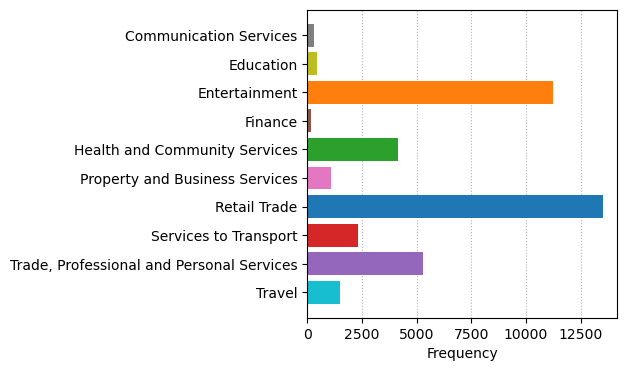

In [115]:
label_freqs = [(df_train['Category'] == label).sum() for label in labels]

plt.figure(figsize=(4,4))
plt.grid(zorder=0, axis='x', linestyle=':')
plt.barh(list(reversed(labels)), list(reversed(label_freqs)), color=list(reversed(palette)), zorder=2)
plt.xlabel('Frequency')
plt.show()

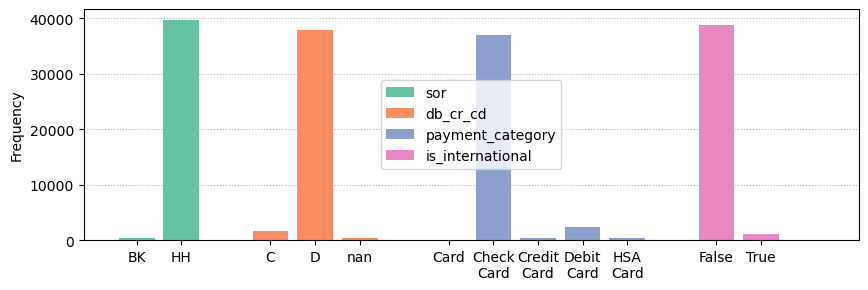

In [117]:
cols = ['sor', 'db_cr_cd','payment_category', 'is_international']

colors = sns.color_palette('Set2')[:4]

plt.figure(figsize=(10,3))
ax = plt.gca()
plt.grid(zorder=0, axis='y', linestyle=':')

for i, (col, color) in enumerate(zip(cols, colors)):
    
    col_data = df_train[col].apply(str)
    vals = sorted(list(set(col_data)))
    val_freqs = [(col_data == val).sum() for val in vals] + [0]
    plt.bar([val.replace(' ', '\n') for val in vals] + [' ' * i], val_freqs, color=color, label=col, zorder=2)
    xticks = ax.xaxis.get_major_ticks()
    xticks[-1].set_visible(False)
    
plt.ylabel('Frequency')
plt.legend(loc='center')
plt.show()

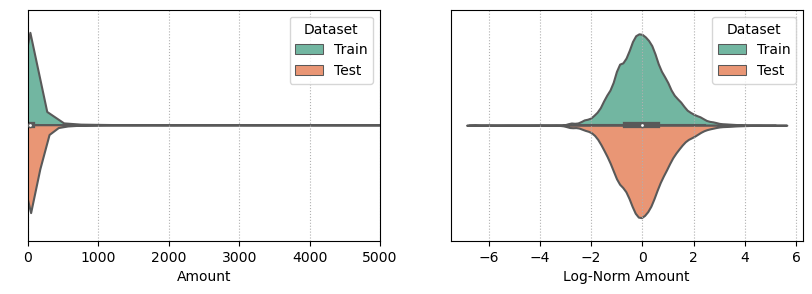

In [243]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

amounts = list(df_train['amt']) + list(df_test['amt'])
log_amounts = np.log(amounts)
log_norm_amounts = (log_amounts - log_amounts.mean()) / log_amounts.std()
dataset = ['Train'] * 40000 + ['Test'] * 10000

df = pd.DataFrame({'Log-Norm Amount' : log_norm_amounts, 'Amount' : amounts, 'Dataset' : dataset, 'y' : ['k'] * 50000})

sns.violinplot(data=df, x='Amount', y='y', hue='Dataset', ax=ax[0], palette='Set2', split=True, bw=0.4)
ax[0].set_xlim([-0,5000])

sns.violinplot(data=df, x='Log-Norm Amount', y='y', hue='Dataset', ax=ax[1], palette='Set2', split=True)

for i in [0,1]:
    ax[i].grid(zorder=0, axis='x', linestyle=':')
    ax[i].set_ylabel('')
    yticks = ax[i].yaxis.get_major_ticks()
    yticks[0].set_visible(False)


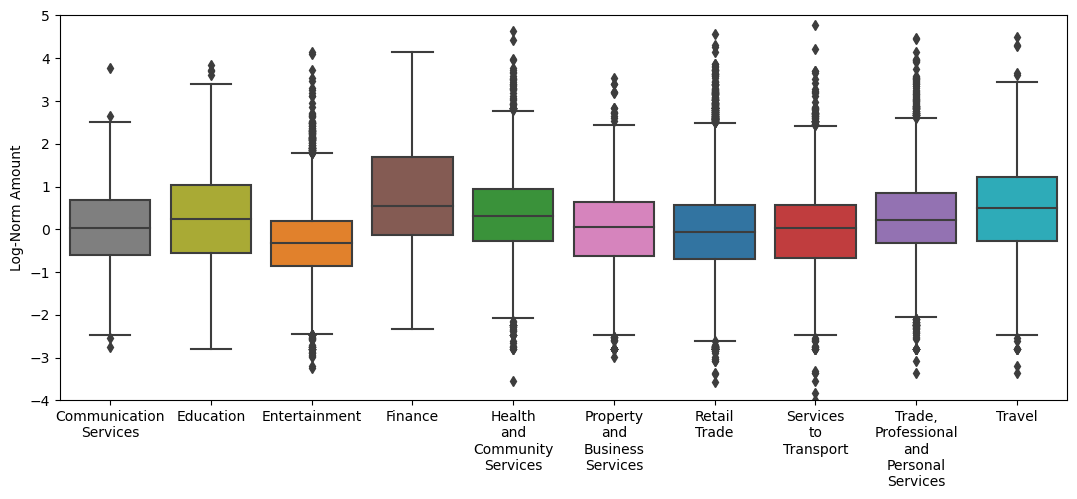

In [202]:
def fit_txt(txt):
    tokens = txt.split(' ')
    return '\n'.join(tokens)
        
fit_labels = [fit_txt(label) for label in labels]

log_amounts = np.log(df_train['amt'])
log_norm_amounts = (log_amounts - log_amounts.mean()) / log_amounts.std()
df = pd.DataFrame({'Log-Norm Amount' : log_norm_amounts, 'Category' : df_train['Category']})

plt.figure(figsize=(13,5))
sns.boxplot(x='Category', y='Log-Norm Amount', data=df, order=labels, palette=palette)
box_labels = [label.get_text() for label in plt.xticks()[1]]
fit_labels = [fit_txt(label) for label in box_labels]
plt.xticks(ticks=list(range(len(labels))), labels=fit_labels)
plt.xlabel('')
plt.ylabel('Log-Norm Amount')
plt.ylim([-4,5])
plt.show()

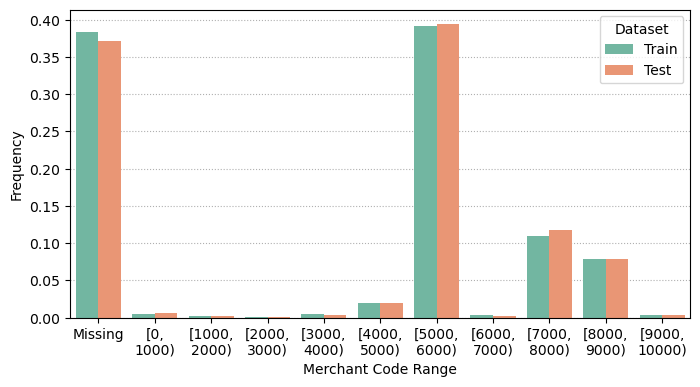

In [242]:
def get_mcode_type(mcode):
    if pd.isnull(mcode):
        return 'Missing'
    ranges = [(1000*i, 1000*(i+1)) for i in range(10)]
    for low, high in ranges:
        if low <= mcode < high:
            return '[' + str(low) + ',\n' + str(high) + ')'
    return 'Missing'



range_list_train = df_train['merchant_cat_code'].apply(get_mcode_type)
ranges = sorted(list(set(range_list_train)))

range_list_test = df_test['merchant_cat_code'].apply(get_mcode_type)

df = pd.DataFrame({'Merchant Code Range' : ranges + ranges, 
                   'Frequency' : [(range_list_train == r).mean() for r in ranges]
                                               + [(range_list_test == r).mean() for r in ranges],
                   'Dataset' : ['Train'] * len(ranges) + ['Test'] * len(ranges)})

plt.figure(figsize=(8,4))
plt.grid(zorder=0, axis='y', linestyle=':')
sns.barplot(x='Merchant Code Range', y='Frequency', hue='Dataset', data=df, palette='Set2', zorder=2)
plt.show()

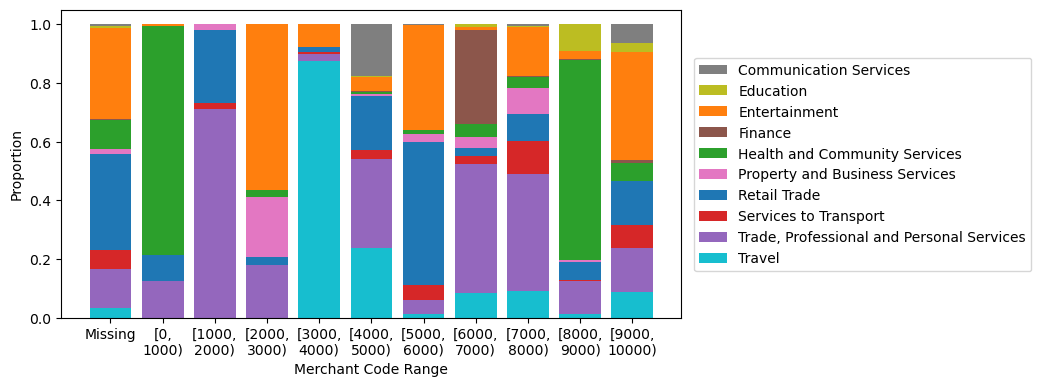

In [220]:
range_list = df_train['merchant_cat_code'].apply(get_mcode_type)
ranges = sorted(list(set(range_list)))

bar_size = np.array([(range_list == r).sum() for r in ranges])
bar_height = np.ones(len(ranges))

plt.figure(figsize=(8,4))

for label, color in zip(labels, palette):
    
    freqs = np.array([((df_train['Category'] == label) & (range_list == r)).sum() for r in ranges])
    plt.bar(ranges, bar_height, color=color, label=label)
    bar_height -= freqs / bar_size

plt.xlabel('Merchant Code Range')
plt.ylabel('Proportion')
plt.legend(loc=(1.02,0.15))
plt.show()

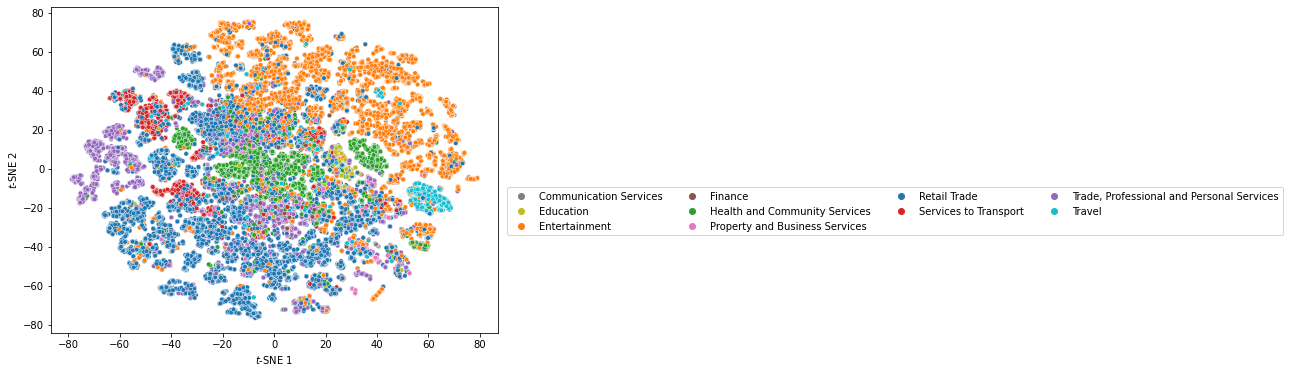

In [36]:
cluster = pd.read_csv('visuals/data/datasets/brand-mcat-desc-stem-tfidf-tsvd50-tsne2-seed1.csv')

cluster['y'] = cluster['y'].map({i : labels[i] for i in range(10)})

plt.figure(figsize=(8,6))

sns.scatterplot(
    x='x1', y='x2',
    hue='y',
    hue_order=labels,
    palette=bright_palette,
    data=cluster,
    alpha=1,
    s=20
)

plt.legend(loc=(1.02,0.3), ncol=4)
plt.xlabel(r'$t$-SNE 1')
plt.ylabel(r'$t$-SNE 2')
plt.show()

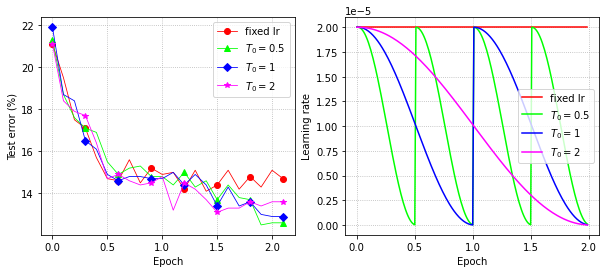

In [46]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
import torch.nn as nn
import torch

df = pd.read_csv('deep_learning/saved_results/bert_cosine.csv').sort_values(by=['settings'])

def get_T_0(settings):
    try:
        s_list = settings.split('T_0-')
        s_str = ''.join(s_list[1:])
        s_list = s_str.split('--')
        T_0 = float(s_list[0])
    except:
        T_0 = 0
    return T_0

def get_seed(settings):
    s_list = settings.split('seed-')
    return int(s_list[1])

df['T_0'] = df['settings'].apply(get_T_0)
df['seed'] = df['settings'].apply(get_seed)

def get_errors(T_0):
    acc_f1s = eval(df[(df['T_0'] == T_0) & (df['seed'] == 1)]['checkpoint_accs'].iloc[0])
    return np.array([1 - x for x, _ in acc_f1s]) * 100
    

errors = {label : get_errors(T_0) for T_0, label in 
                              zip([0, 0.5, 1, 2], ['fixed lr', r'$T_{0} = 0.5$', r'$T_{0} = 1$', r'$T_{0} = 2$'])}

epochs = np.array(list(range(len(errors['fixed lr'])))) / 10

markers = ['o', '^', 'D', '*']
colors = [(1,0,0), (0,1,0), (0,0,1), (1,0,1)]

fig, ax = plt.subplots(1, 2, figsize=(10,4))

for i, label in enumerate(errors):
    ax[0].plot(epochs, errors[label], label=label, marker=markers[i], markevery=3, color=colors[i], linewidth=0.8)
ax[0].legend()
ax[0].grid(linestyle=':')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Test error (%)')


def get_lrs(T_0):

    class Model(nn.Module):
        def __init__(self):
            super(Model, self).__init__()
            self.fc = nn.Linear(10,1)
        def forward(self, x):
            return self.fc(x)

    model = Model()
    optimizer = optim.Adam(params=model.parameters(), lr=2e-5)
    
    try:
        scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=int(100 * T_0), T_mult=1)
    except:
        return [2e-5] * 200

    lrs = []

    for i in range(200):
        lrs.append(scheduler.get_last_lr()[0])
        scheduler.step(i)
    
    return lrs

epochs = np.array(list(range(200))) / 100

for i, (T_0, label) in enumerate(zip([0, 0.5, 1, 2], errors)):
    ax[1].plot(epochs, get_lrs(T_0), label=label, color=colors[i])
ax[1].legend(loc='center right')
ax[1].grid(linestyle=':')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Learning rate')
plt.show()